## Libraries

In [1]:
import pandas as pd
import plotly.express as px
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('coffee.csv')

In [3]:
df = data.copy()

In [4]:
#review of repeated rows
df.duplicated().sum()

0

In [5]:
# view summary of dataset
df.head(2)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [6]:
df.drop(columns = ["Unnamed: 0","ID"],axis=1,inplace=True)
df.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [7]:
print(f"shape : {df.shape} size : {df.size}")

shape : (207, 39) size : 8073


## EDA

In [8]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      207 non-null    object 
 1   Farm Name              205 non-null    object 
 2   Lot Number             206 non-null    object 
 3   Mill                   204 non-null    object 
 4   ICO Number             75 non-null     object 
 5   Company                207 non-null    object 
 6   Altitude               206 non-null    object 
 7   Region                 205 non-null    object 
 8   Producer               206 non-null    object 
 9   Number of Bags         207 non-null    int64  
 10  Bag Weight             207 non-null    object 
 11  In-Country Partner     207 non-null    object 
 12  Harvest Year           207 non-null    object 
 13  Grading Date           207 non-null    object 
 14  Owner                  207 non-null    object 
 15  Variet

In [9]:
#view of the number of null data in the columns
df.isnull().sum()

Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers                    0
Color                      0
Category Two D

In [10]:
# view statistics of number type columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Bags,207.0,155.449275,244.484868,1.00,1.00,14.00,275.000,2240.00
Aroma,207.0,7.721063,0.287626,6.50,7.58,7.67,7.920,8.58
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00
Clean Cup,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00
Sweetness,207.0,10.000000,0.000000,10.00,10.00,10.00,10.000,10.00


In [11]:
# View statistics of categorical columns
df[[col for col in df.columns if df[str(col)].dtype=="O"]].describe().T

,count,unique,top,freq
Country of Origin,207,22,Taiwan,61
Farm Name,205,172,Doi Tung Development Project,7
Lot Number,206,187,1,11
Mill,204,162,Dry Mill,11
ICO Number,75,67,non,5
Company,207,72,Taiwan Coffee Laboratory,51
Altitude,206,97,1200,23
Region,205,120,Chiayi,12
Producer,206,172,Doi Tung Development Project,7
Bag Weight,207,39,30 kg,39


<Axes: xlabel='Total Cup Points', ylabel='Count'>

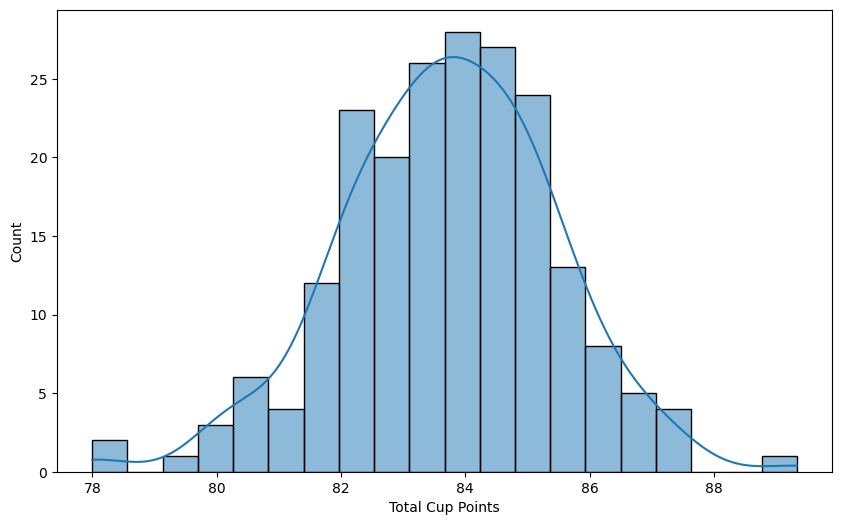

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df["Total Cup Points"],kde=True,bins=20)

In [13]:
df.groupby("Country of Origin")[["Total Cup Points"]].sum()

,Total Cup Points
Country of Origin,
Brazil,818.83
Colombia,1593.67
Costa Rica,669.92
El Salvador,570.73
Ethiopia,934.57
Guatemala,1770.33
Honduras,1082.67
Indonesia,251.08
Kenya,167.42


In [14]:
def uniq_size(data):
    for col in data.columns:
        print(f"Name: {col}")
        print(f"Unique_numbers :{col}: {df[str(col)].nunique()}")
        print(f"Size_numbers :{col}: {df[str(col)].size}")
        print(f"Null_numbers :{col}: {df[str(col)].isnull().sum()}")
        print()
        print("*"*30)
        print("\n\n")
uniq_size(df)

Name: Country of Origin
Unique_numbers :Country of Origin: 22
Size_numbers :Country of Origin: 207
Null_numbers :Country of Origin: 0

******************************



Name: Farm Name
Unique_numbers :Farm Name: 172
Size_numbers :Farm Name: 207
Null_numbers :Farm Name: 2

******************************



Name: Lot Number
Unique_numbers :Lot Number: 187
Size_numbers :Lot Number: 207
Null_numbers :Lot Number: 1

******************************



Name: Mill
Unique_numbers :Mill: 162
Size_numbers :Mill: 207
Null_numbers :Mill: 3

******************************



Name: ICO Number
Unique_numbers :ICO Number: 67
Size_numbers :ICO Number: 207
Null_numbers :ICO Number: 132

******************************



Name: Company
Unique_numbers :Company: 72
Size_numbers :Company: 207
Null_numbers :Company: 0

******************************



Name: Altitude
Unique_numbers :Altitude: 97
Size_numbers :Altitude: 207
Null_numbers :Altitude: 1

******************************



Name: Region
Unique_numbers 

In [15]:
df[df["Total Cup Points"]==df["Total Cup Points"].max()]

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


# Data cleaning

## Altitude column
#### Altitude column bush cleaning

In [16]:
print(df.Altitude.isnull().sum())

1


In [17]:
def clean_Altitude(data,col):
    def clean_altitude_value(value_comp):
        if "-" in value_comp:
            value =sum(map(int,[val.strip() for val in value_comp.split("-")]))/2
            return value
        if "A" in value_comp:
            value =sum(map(int,[val.strip() for val in value_comp.split("A")]))/2
            return value
        if "~" in value_comp:
            value =sum(map(int,[val.strip() for val in value_comp.split("~")]))/2
            return value
        
    df[str(col)]=[clean_altitude_value(value) if type(value)!= float and not(value.isnumeric())\
                                                                                else value for value in data[str(col)]]
clean_Altitude(df,"Altitude")

In [18]:
df.Altitude = df.Altitude.astype(float)
df.Altitude.fillna(mt.floor(df.Altitude.mean()),inplace=True)

In [19]:
df.Altitude

0      1815.0
1      1200.0
2      1300.0
3      1900.0
4      1975.0
        ...  
202     950.0
203    1200.0
204    1300.0
205    1200.0
206     975.0
Name: Altitude, Length: 207, dtype: float64

## Expiration column
#### Expiration bush cleaning

In [20]:
df['Expiration'] 

0      September 21st, 2023
1       November 15th, 2023
2       November 15th, 2023
3      September 21st, 2023
4           March 5th, 2024
               ...         
202      February 2nd, 2024
203         March 2nd, 2024
204     November 11th, 2023
205         March 7th, 2024
206     November 18th, 2023
Name: Expiration, Length: 207, dtype: object

In [21]:
df

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950.0,Sul de Minas,Ipanema Coffees,2240,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200.0,Matagalpa,Exportadora Atlantic S.A.,300,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300.0,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",343,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200.0,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,1,...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [22]:
df['Expiration'] = pd.to_datetime(df['Expiration'])

In [23]:
df["Expiration_day"] = df.Expiration.dt.day
df["Expiration_month"] = df.Expiration.dt.month
df.drop("Expiration",axis = 1,inplace = True)

In [24]:
df.head(2)

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Certification Body,Certification Address,Certification Contact,Expiration_day,Expiration_month
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,11.8,0,0,green,3,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,21,9
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,...,10.5,0,0,blue-green,0,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",15,11


In [25]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
df = encode(df, 'Expiration_month', 12)
df = encode(df, 'Expiration_day', 31)
df.drop(["Expiration_day","Expiration_month"],axis = 1,inplace = True)

In [26]:
df.head(2)

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Quakers,Color,Category Two Defects,Certification Body,Certification Address,Certification Contact,Expiration_month_sin,Expiration_month_cos,Expiration_day_sin,Expiration_day_cos
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,0,green,3,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,-1.0,-1.836970e-16,-0.897805,-0.440394
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,...,0,blue-green,0,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",-0.5,8.660254e-01,0.101168,-0.994869


## Bag Weight column 
#### Bag Weight column  bush cleaning

In [27]:
df["Bag Weight"].unique()

array(['35 kg', '80 kg', '25 kg', '22 kg', '24 kg', '30 kg', '27 kg',
       '90 kg', '60 kg', '15 kg', '5 kg', '2 kg', '1 kg', '20 kg',
       '50 kg', '100 kg', '85 kg', '48 kg', '19200 kg', '10 kg', '69 kg',
       '13 kg', '4 kg', '36 kg', '16 kg', '45 kg', '104 kg', '300 kg',
       '70 kg', '110 kg', '40 kg', '8 kg', '320 kg', '12 kg', '32 kg',
       '200 kg', '3 kg', '6 kg', '59 kg'], dtype=object)

In [28]:
df["Bag Weight"] = df["Bag Weight"].apply(lambda x:int(x.split()[0]))
df["Bag Weight"]

0      35
1      80
2      25
3      22
4      24
       ..
202    60
203    30
204    60
205     2
206    60
Name: Bag Weight, Length: 207, dtype: int64

## Grading Date column 
#### Grading Date column  bush cleaning

In [29]:
df["Grading Date"]

0      September 21st, 2022
1       November 15th, 2022
2       November 15th, 2022
3      September 21st, 2022
4           March 6th, 2023
               ...         
202      February 2nd, 2023
203         March 3rd, 2023
204     November 11th, 2022
205         March 8th, 2023
206     November 18th, 2022
Name: Grading Date, Length: 207, dtype: object

In [30]:
df['Grading Date'] = pd.to_datetime(df['Grading Date'])

In [31]:
df['Grading Date']


0     2022-09-21
1     2022-11-15
2     2022-11-15
3     2022-09-21
4     2023-03-06
         ...    
202   2023-02-02
203   2023-03-03
204   2022-11-11
205   2023-03-08
206   2022-11-18
Name: Grading Date, Length: 207, dtype: datetime64[ns]

In [32]:
df["Grading_Date_day"] = df['Grading Date'].dt.day
df["Grading_Date_month"]  = df['Grading Date'].dt.month

In [33]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
df = encode(df, 'Grading_Date_day', 12)
df = encode(df, 'Grading_Date_month', 31)
df.drop(["Grading_Date_day","Grading_Date_month","Grading Date"],axis = 1,inplace = True)

In [34]:
df.head(2)

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Certification Address,Certification Contact,Expiration_month_sin,Expiration_month_cos,Expiration_day_sin,Expiration_day_cos,Grading_Date_day_sin,Grading_Date_day_cos,Grading_Date_month_sin,Grading_Date_month_cos
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,-1.0,-1.836970e-16,-0.897805,-0.440394,-1.0,-4.286264e-16,0.968077,-0.250653
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,...,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",-0.5,8.660254e-01,0.101168,-0.994869,1.0,1.194340e-15,0.790776,-0.612106


## Color column
#### We converted the Color column from categorical type to numeric type values

In [35]:
df = pd.get_dummies(data=df,columns=["Color"],drop_first=True)

In [36]:
df.head(2)

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Color_browish-green,Color_brownish,Color_green,Color_greenish,Color_pale yellow,Color_yello-green,Color_yellow green,Color_yellow- green,Color_yellow-green,Color_yellowish
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,0,0,1,0,0,0,0,0,0,0
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,...,0,0,0,0,0,0,0,0,0,0


# Mill,Company and Farm Name columns
### These columns will be removed from the data. Their presence does not make an important difference to the model.

In [37]:
df[["Mill","Farm Name","Company"]]

,Mill,Farm Name,Company
0,Finca El Paraiso,Finca El Paraiso,Coffee Quality Union
1,Royal Bean Geisha Estate,Royal Bean Geisha Estate,Taiwan Coffee Laboratory
2,oklao coffee processing plant,OKLAO coffee farms,Taiwan Coffee Laboratory
3,La Montana Tarrazu MIll,La Cumbre,Coffee Quality Union
4,Finca Santuario,Finca Santuario,Coffee Quality Union
...,...,...,...
202,Dry Mill,Fazenda Conquista,Ipanema Coffees
203,Beneficio Atlantic Sébaco,Finca San Felipe,Exportadora Atlantic S.A
204,DRY MILL,-,Marubeni Corporation
205,"Optimum Coffee, San Salvador, El Salvador","Rosario de Maria II, Area de La Pila",Aprentium Enterprises LLC


In [38]:
df.drop(columns=["Mill","Farm Name","Company"],axis = 1,inplace=True)

In [39]:
df.head()

,Country of Origin,Lot Number,ICO Number,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,...,Color_browish-green,Color_brownish,Color_green,Color_greenish,Color_pale yellow,Color_yello-green,Color_yellow green,Color_yellow- green,Color_yellow-green,Color_yellowish
0,Colombia,CQU2022015,NaN,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35,Japan Coffee Exchange,2021 / 2022,...,0,0,1,0,0,0,0,0,0,0
1,Taiwan,"The 2022 Pacific Rim Coffee Summit,T037",NaN,1200.0,Chiayi,曾福森,1,80,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,...,0,0,0,0,0,0,0,0,0,0
2,Laos,"The 2022 Pacific Rim Coffee Summit,LA01",NaN,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,...,0,0,0,0,0,0,0,0,0,1
3,Costa Rica,CQU2022017,NaN,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22,Japan Coffee Exchange,2022,...,0,0,1,0,0,0,0,0,0,0
4,Colombia,CQU2023002,NaN,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24,Japan Coffee Exchange,2022,...,0,0,0,0,0,0,0,0,1,0


# ICO Number columns
### Since 63 percent of this column has null values, it makes no sense to fill and use this column. Therefore, this column will be discarded.

In [40]:
df["ICO Number"].isnull().sum()/len(df["ICO Number"])*100

63.76811594202898

In [41]:
df.drop(columns=["ICO Number"],axis = 1,inplace=True)

In [42]:
df.head(2)

,Country of Origin,Lot Number,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,...,Color_browish-green,Color_brownish,Color_green,Color_greenish,Color_pale yellow,Color_yello-green,Color_yellow green,Color_yellow- green,Color_yellow-green,Color_yellowish
0,Colombia,CQU2022015,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35,Japan Coffee Exchange,2021 / 2022,Coffee Quality Union,...,0,0,1,0,0,0,0,0,0,0
1,Taiwan,"The 2022 Pacific Rim Coffee Summit,T037",1200.0,Chiayi,曾福森,1,80,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,...,0,0,0,0,0,0,0,0,0,0


# Lot Number column
### This column will be discarded as no useful information for the model will be obtained in this column.

In [43]:
df["Lot Number"].unique()

array(['CQU2022015', 'The 2022 Pacific Rim Coffee Summit,T037',
       'The 2022 Pacific Rim Coffee Summit,LA01', 'CQU2022017',
       'CQU2023002', 'The 2022 Pacific Rim Coffee Summit,GT02',
       'The 2022 Pacific Rim Coffee Summit,T034',
       'The 2022 Pacific Rim Coffee Summit,T050',
       'The 2022 Pacific Rim Coffee Summit,T018',
       'CN 4127230034/4189230113', '010/0296/600',
       'The 2022 Pacific Rim Coffee Summit,GT12',
       'The 2022 Pacific Rim Coffee Summit,T051',
       'Grade 1, Guji, Natural, Gelana Geisha',
       'The 2022 Pacific Rim Coffee Summit,CO03',
       'The 2022 Pacific Rim Coffee Summit,T014', 'CQU2023006', '202203',
       '202112', 'CN 4127230032/P-9140',
       'The 2022 Pacific Rim Coffee Summit,GT03', '2022/03', '1',
       'CQU2023005', 'The 2022 Pacific Rim Coffee Summit, T003',
       'Arara 1', 'The 2022 Pacific Rim Coffee Summit,T024',
       'The 2022 Pacific Rim Coffee Summit,T048',
       'The 2022 Pacific Rim Coffee Summit,T045',
  

In [44]:
df.drop(columns=["Lot Number"],axis = 1,inplace=True)

In [45]:
df.head(2)

,Country of Origin,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Owner,Variety,...,Color_browish-green,Color_brownish,Color_green,Color_greenish,Color_pale yellow,Color_yello-green,Color_yellow green,Color_yellow- green,Color_yellow-green,Color_yellowish
0,Colombia,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35,Japan Coffee Exchange,2021 / 2022,Coffee Quality Union,Castillo,...,0,0,1,0,0,0,0,0,0,0
1,Taiwan,1200.0,Chiayi,曾福森,1,80,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.columns

Index(['Country of Origin', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Owner', 'Variety',
       'Status', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Category Two Defects',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'Expiration_month_sin', 'Expiration_month_cos', 'Expiration_day_sin',
       'Expiration_day_cos', 'Grading_Date_day_sin', 'Grading_Date_day_cos',
       'Grading_Date_month_sin', 'Grading_Date_month_cos',
       'Color_bluish-green', 'Color_browish-green', 'Color_brownish',
       'Color_green', 'Color_greenish', 'Color_pale yellow',
       'Color_yello-green', 'Color_yellow green', 'Color_yellow- green',
       'Color_yellow-green', 'Color_yellowish'],
      dtyp

# Columns to be thrown
### I am discarding these columns because I think they are of no use to the model

In [47]:
df.drop(columns=["Producer","In-Country Partner","Harvest Year","Certification Body","Certification Address","Certification Contact","Owner","Defects"]\
       ,axis=1,inplace=True)

In [48]:
df.head()

,Country of Origin,Altitude,Region,Number of Bags,Bag Weight,Variety,Status,Processing Method,Aroma,Flavor,...,Color_browish-green,Color_brownish,Color_green,Color_greenish,Color_pale yellow,Color_yello-green,Color_yellow green,Color_yellow- green,Color_yellow-green,Color_yellowish
0,Colombia,1815.0,"Piendamo,Cauca",1,35,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,...,0,0,1,0,0,0,0,0,0,0
1,Taiwan,1200.0,Chiayi,1,80,Gesha,Completed,Washed / Wet,8.50,8.50,...,0,0,0,0,0,0,0,0,0,0
2,Laos,1300.0,Laos Borofen Plateau,19,25,Java,Completed,Semi Washed,8.33,8.42,...,0,0,0,0,0,0,0,0,0,1
3,Costa Rica,1900.0,"Los Santos,Tarrazu",1,22,Gesha,Completed,Washed / Wet,8.08,8.17,...,0,0,1,0,0,0,0,0,0,0
4,Colombia,1975.0,"Popayan,Cauca",2,24,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df.columns

Index(['Country of Origin', 'Altitude', 'Region', 'Number of Bags',
       'Bag Weight', 'Variety', 'Status', 'Processing Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Overall', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers',
       'Category Two Defects', 'Expiration_month_sin', 'Expiration_month_cos',
       'Expiration_day_sin', 'Expiration_day_cos', 'Grading_Date_day_sin',
       'Grading_Date_day_cos', 'Grading_Date_month_sin',
       'Grading_Date_month_cos', 'Color_bluish-green', 'Color_browish-green',
       'Color_brownish', 'Color_green', 'Color_greenish', 'Color_pale yellow',
       'Color_yello-green', 'Color_yellow green', 'Color_yellow- green',
       'Color_yellow-green', 'Color_yellowish'],
      dtype='object')

# Variety column
### Assuming that each type of coffee has no advantage over the other, we add them to our model as they may affect the performance of the model. We also replace the "unknown" and "unknow" values ​​with the most frequently occurring values.

In [50]:
df.Variety.unique()

array(['Castillo', 'Gesha', 'Java', 'Red Bourbon', 'Sl34+Gesha', 'SL34',
       'Bourbon', 'Ethiopian Heirlooms', 'Caturra',
       'Wolishalo,Kurume,Dega', 'Typica', 'Catimor',
       'Castillo Paraguaycito', nan, 'SL28', 'SL14', 'Catuai',
       'Yellow Bourbon', 'Catrenic', 'unknown', 'Pacamara',
       'Castillo and Colombia blend', 'Jember,TIM-TIM,Ateng',
       'BOURBON, CATURRA Y CATIMOR', 'Bourbon Sidra', 'Sarchimor',
       'Catimor,Catuai,Caturra,Bourbon', 'Parainema', 'SHG',
       'Typica + SL34',
       'MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI',
       'Mundo Novo', 'Red Bourbon,Caturra', 'Lempira', 'Typica Gesha',
       'Gayo', 'Bourbon, Catimor, Caturra, Typica', 'unknow',
       'Maragogype', 'Caturra-Catuai', 'SL28,SL34,Ruiru11',
       'Yellow Catuai', 'Catucai', 'Santander',
       'Typica Bourbon Caturra Catimor', 'Caturra,Colombia,Castillo',
       'Castillo,Caturra,Bourbon', 'Pacas', 'Catuai and Mundo Novo'],
      dtype=object)

In [51]:
df.Variety.value_counts()

Caturra                                                         27
Gesha                                                           27
Typica                                                          23
Bourbon                                                         17
Catuai                                                          12
unknown                                                         12
Catimor                                                         11
Ethiopian Heirlooms                                              9
SL34                                                             8
Mundo Novo                                                       4
SL14                                                             3
Yellow Bourbon                                                   3
SHG                                                              3
Java                                                             3
Maragogype                                                    

In [52]:
df.Variety[(df["Variety"]=="unknow") | (df["Variety"]=="unknown")]

69     unknown
84     unknown
108    unknown
110    unknown
130    unknown
135    unknown
153     unknow
162    unknown
167    unknown
172    unknown
173    unknown
174    unknown
189    unknown
Name: Variety, dtype: object

In [53]:
df.Variety.mode()

0    Caturra
1      Gesha
Name: Variety, dtype: object

In [54]:
df["Variety"] = df["Variety"].apply(lambda x : df["Variety"].mode()[0] if (x=="unknow") | (x=="unknown") else x)

In [55]:
df = pd.get_dummies(data = df,columns=["Variety"],drop_first=True)

In [56]:
df.columns

Index(['Country of Origin', 'Altitude', 'Region', 'Number of Bags',
       'Bag Weight', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Overall', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Category Two Defects',
       'Expiration_month_sin', 'Expiration_month_cos', 'Expiration_day_sin',
       'Expiration_day_cos', 'Grading_Date_day_sin', 'Grading_Date_day_cos',
       'Grading_Date_month_sin', 'Grading_Date_month_cos',
       'Color_bluish-green', 'Color_browish-green', 'Color_brownish',
       'Color_green', 'Color_greenish', 'Color_pale yellow',
       'Color_yello-green', 'Color_yellow green', 'Color_yellow- green',
       'Color_yellow-green', 'Color_yellowish', 'Variety_Bourbon',
       'Variety_Bourbon Sidra', 'Variety_Bourbon, Catimor, Caturra, Typica',
       'Variety_Castillo', 'Variety_Castillo Paraguaycito',
       'Variety_Castil

# Uniformity column
### The Uniformity column has 205 values ​​of 10, 1 value of 9.33, and 1 value of 8.67. We assume that the maximum value is 10, so we divide the entire column by 10 to normalize the values.

In [57]:
df.Uniformity.value_counts()

10.00    205
9.33       1
8.67       1
Name: Uniformity, dtype: int64

In [58]:
df["Uniformity"] = df.Uniformity/10

In [59]:
df.head(2)

,Country of Origin,Altitude,Region,Number of Bags,Bag Weight,Status,Processing Method,Aroma,Flavor,Aftertaste,...,Variety_Santander,Variety_Sarchimor,Variety_Sl34+Gesha,Variety_Typica,Variety_Typica + SL34,Variety_Typica Bourbon Caturra Catimor,Variety_Typica Gesha,"Variety_Wolishalo,Kurume,Dega",Variety_Yellow Bourbon,Variety_Yellow Catuai
0,Colombia,1815.0,"Piendamo,Cauca",1,35,Completed,Double Anaerobic Washed,8.58,8.5,8.42,...,0,0,0,0,0,0,0,0,0,0
1,Taiwan,1200.0,Chiayi,1,80,Completed,Washed / Wet,8.50,8.5,7.92,...,0,0,0,0,0,0,0,0,0,0


In [60]:
list(df.columns)

['Country of Origin',
 'Altitude',
 'Region',
 'Number of Bags',
 'Bag Weight',
 'Status',
 'Processing Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean Cup',
 'Sweetness',
 'Overall',
 'Total Cup Points',
 'Moisture Percentage',
 'Category One Defects',
 'Quakers',
 'Category Two Defects',
 'Expiration_month_sin',
 'Expiration_month_cos',
 'Expiration_day_sin',
 'Expiration_day_cos',
 'Grading_Date_day_sin',
 'Grading_Date_day_cos',
 'Grading_Date_month_sin',
 'Grading_Date_month_cos',
 'Color_bluish-green',
 'Color_browish-green',
 'Color_brownish',
 'Color_green',
 'Color_greenish',
 'Color_pale yellow',
 'Color_yello-green',
 'Color_yellow green',
 'Color_yellow- green',
 'Color_yellow-green',
 'Color_yellowish',
 'Variety_Bourbon',
 'Variety_Bourbon Sidra',
 'Variety_Bourbon, Catimor, Caturra, Typica',
 'Variety_Castillo',
 'Variety_Castillo Paraguaycito',
 'Variety_Castillo and Colombia blend',
 'Variety_Castillo,Caturra,Bourbon

# Country of Origin column
### We add the Country of Origin column to the model because we think it might be useful.

In [61]:
df["Country of Origin"].value_counts()

Taiwan                          61
Guatemala                       21
Colombia                        19
Honduras                        13
Thailand                        12
Ethiopia                        11
Brazil                          10
Costa Rica                       8
Nicaragua                        7
El Salvador                      7
Tanzania, United Republic Of     6
United States (Hawaii)           5
Mexico                           4
Peru                             4
Vietnam                          4
Uganda                           3
Indonesia                        3
Laos                             3
Panama                           2
Kenya                            2
Madagascar                       1
Myanmar                          1
Name: Country of Origin, dtype: int64

In [62]:
df  =pd.get_dummies(data = df,columns = ["Country of Origin"],drop_first=True)


In [63]:
df.head()

,Altitude,Region,Number of Bags,Bag Weight,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Country of Origin_Myanmar,Country of Origin_Nicaragua,Country of Origin_Panama,Country of Origin_Peru,Country of Origin_Taiwan,"Country of Origin_Tanzania, United Republic Of",Country of Origin_Thailand,Country of Origin_Uganda,Country of Origin_United States (Hawaii),Country of Origin_Vietnam
0,1815.0,"Piendamo,Cauca",1,35,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,Chiayi,1,80,Completed,Washed / Wet,8.50,8.50,7.92,8.00,...,0,0,0,0,1,0,0,0,0,0
2,1300.0,Laos Borofen Plateau,19,25,Completed,Semi Washed,8.33,8.42,8.08,8.17,...,0,0,0,0,0,0,0,0,0,0
3,1900.0,"Los Santos,Tarrazu",1,22,Completed,Washed / Wet,8.08,8.17,8.17,8.25,...,0,0,0,0,0,0,0,0,0,0
4,1975.0,"Popayan,Cauca",2,24,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,...,0,0,0,0,0,0,0,0,0,0


# Processing Method column
### We add the Processing Method column to the model because we think it might be useful.

In [64]:
df["Processing Method"].value_counts()

Washed / Wet                            124
Natural / Dry                            46
Pulped natural / honey                   25
Double Anaerobic Washed                   1
Semi Washed                               1
Honey,Mossto                              1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000h                          1
SEMI-LAVADO                               1
Name: Processing Method, dtype: int64

In [65]:
df  =pd.get_dummies(data = df,columns = ["Processing Method"],drop_first=True)

In [66]:
df.head()

,Altitude,Region,Number of Bags,Bag Weight,Status,Aroma,Flavor,Aftertaste,Acidity,Body,...,Country of Origin_Vietnam,Processing Method_Double Anaerobic Washed,Processing Method_Double Carbonic Maceration / Natural,"Processing Method_Honey,Mossto",Processing Method_Natural / Dry,Processing Method_Pulped natural / honey,Processing Method_SEMI-LAVADO,Processing Method_Semi Washed,Processing Method_Washed / Wet,Processing Method_Wet Hulling
0,1815.0,"Piendamo,Cauca",1,35,Completed,8.58,8.50,8.42,8.58,8.25,...,0,1,0,0,0,0,0,0,0,0
1,1200.0,Chiayi,1,80,Completed,8.50,8.50,7.92,8.00,7.92,...,0,0,0,0,0,0,0,0,1,0
2,1300.0,Laos Borofen Plateau,19,25,Completed,8.33,8.42,8.08,8.17,7.92,...,0,0,0,0,0,0,0,1,0,0
3,1900.0,"Los Santos,Tarrazu",1,22,Completed,8.08,8.17,8.17,8.25,8.17,...,0,0,0,0,0,0,0,0,1,0
4,1975.0,"Popayan,Cauca",2,24,Completed,8.33,8.33,8.08,8.25,7.92,...,0,0,0,1,0,0,0,0,0,0


# Status Method column
### Since the Status column has all the same values, this column will be discarded.

In [67]:
df.Status.value_counts()

Completed    207
Name: Status, dtype: int64

In [68]:
df.drop(columns="Status",axis=1,inplace=True)

In [69]:
df.head()

,Altitude,Region,Number of Bags,Bag Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Country of Origin_Vietnam,Processing Method_Double Anaerobic Washed,Processing Method_Double Carbonic Maceration / Natural,"Processing Method_Honey,Mossto",Processing Method_Natural / Dry,Processing Method_Pulped natural / honey,Processing Method_SEMI-LAVADO,Processing Method_Semi Washed,Processing Method_Washed / Wet,Processing Method_Wet Hulling
0,1815.0,"Piendamo,Cauca",1,35,8.58,8.50,8.42,8.58,8.25,8.42,...,0,1,0,0,0,0,0,0,0,0
1,1200.0,Chiayi,1,80,8.50,8.50,7.92,8.00,7.92,8.25,...,0,0,0,0,0,0,0,0,1,0
2,1300.0,Laos Borofen Plateau,19,25,8.33,8.42,8.08,8.17,7.92,8.17,...,0,0,0,0,0,0,0,1,0,0
3,1900.0,"Los Santos,Tarrazu",1,22,8.08,8.17,8.17,8.25,8.17,8.08,...,0,0,0,0,0,0,0,0,1,0
4,1975.0,"Popayan,Cauca",2,24,8.33,8.33,8.08,8.25,7.92,7.92,...,0,0,0,1,0,0,0,0,0,0


# Region column
### We could have added the Region column to the model. However, to avoid this, we need to drop the Region column because there will be 120 additional columns.

In [70]:
len(df.Region.value_counts())

120

In [71]:
df.Region.value_counts()

Chiayi                         12
新竹縣                            11
苗栗縣                             7
North of Thailand               7
Yunlin                          7
                               ..
Addis Ababa                     1
Ka'u district of Big Island     1
玉里鎮Yuli Township                1
Ethiopia                        1
Minas Gerais                    1
Name: Region, Length: 120, dtype: int64

In [72]:
df.drop(columns=["Region"],axis = 1,inplace = True)

In [73]:
df.head(2)

,Altitude,Number of Bags,Bag Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,...,Country of Origin_Vietnam,Processing Method_Double Anaerobic Washed,Processing Method_Double Carbonic Maceration / Natural,"Processing Method_Honey,Mossto",Processing Method_Natural / Dry,Processing Method_Pulped natural / honey,Processing Method_SEMI-LAVADO,Processing Method_Semi Washed,Processing Method_Washed / Wet,Processing Method_Wet Hulling
0,1815.0,1,35,8.58,8.5,8.42,8.58,8.25,8.42,1.0,...,0,1,0,0,0,0,0,0,0,0
1,1200.0,1,80,8.50,8.5,7.92,8.00,7.92,8.25,1.0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
df.corr()[["Total Cup Points"]]

,Total Cup Points
Altitude,0.120916
Number of Bags,-0.243753
Bag Weight,0.038214
Aroma,0.868919
Flavor,0.939124
...,...
Processing Method_Pulped natural / honey,-0.033186
Processing Method_SEMI-LAVADO,-0.230326
Processing Method_Semi Washed,0.149880
Processing Method_Washed / Wet,-0.043082


# Cleaning outliers
### We look at all numeric columns one by one to remove outliers

In [75]:
columns_list=list(df.columns)[0:18]
columns_list.remove('Total Cup Points')
columns_list.remove("Uniformity")
columns_list.remove("Sweetness")
columns_list.remove("Clean Cup")
columns_list.remove("Category One Defects")
columns_list

['Altitude',
 'Number of Bags',
 'Bag Weight',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Overall',
 'Moisture Percentage',
 'Quakers',
 'Category Two Defects']

# Columns that are outliers

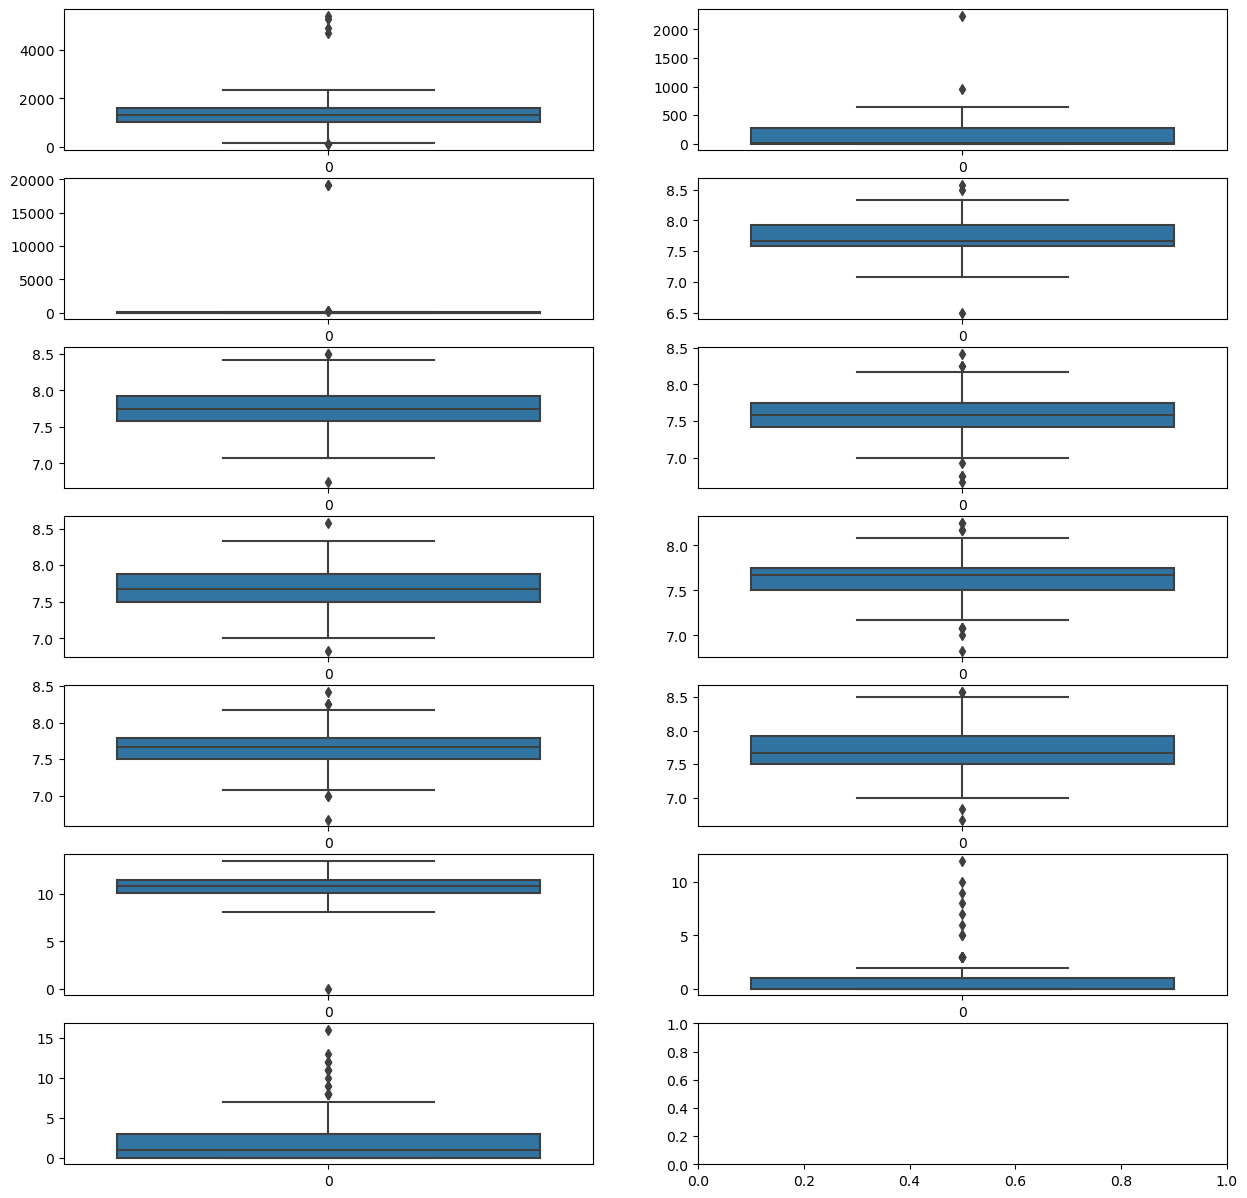

In [76]:
def box_columns(data,columns):
    fig,ax =plt.subplots(ncols=2,nrows=7,figsize=(15,15))
    k=0
    for i in range(0,7):
           for j in range(0,2):
                if k==13:
                    continue
                sns.boxplot(data[columns[k]],ax = ax[i][j])
                k=k+1
box_columns(df,columns_list)

# External data compression

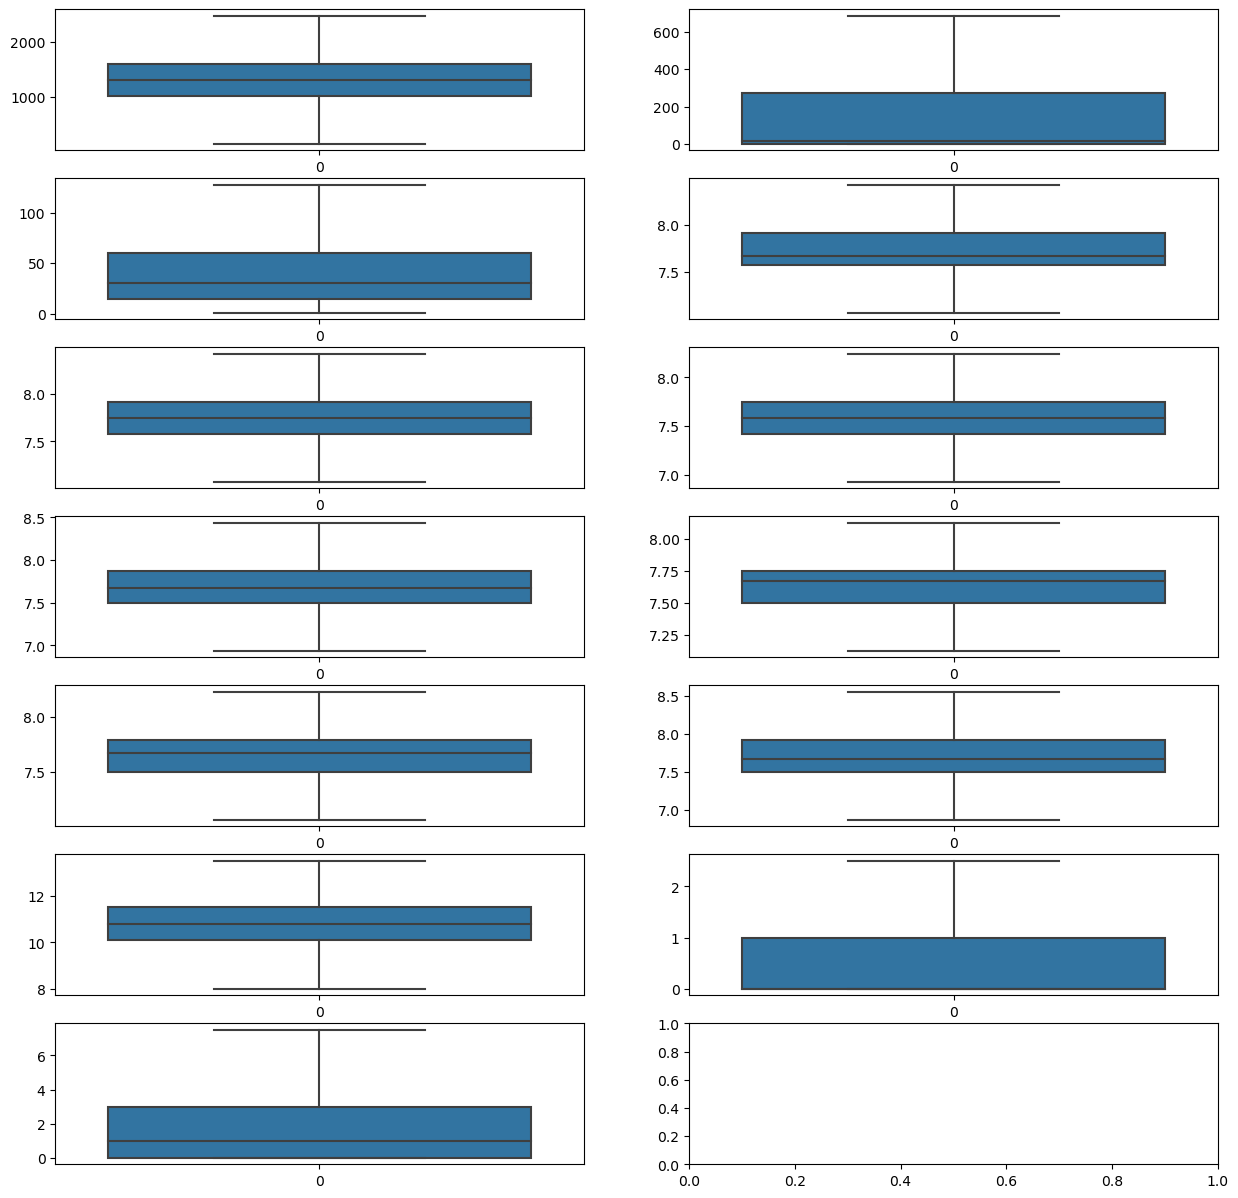

In [77]:
def outlier_cleaning(data,columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        upper = Q3+IQR*1.5
        lower = Q1-IQR*1.5
        data[col] = data[col].apply(lambda x:  upper if x>upper else x)
        data[col] = data[col].apply(lambda x:  lower if x<lower else x)
outlier_cleaning(df,columns_list)
box_columns(df,columns_list)

### We look at the distribution of numeric columns with the target column

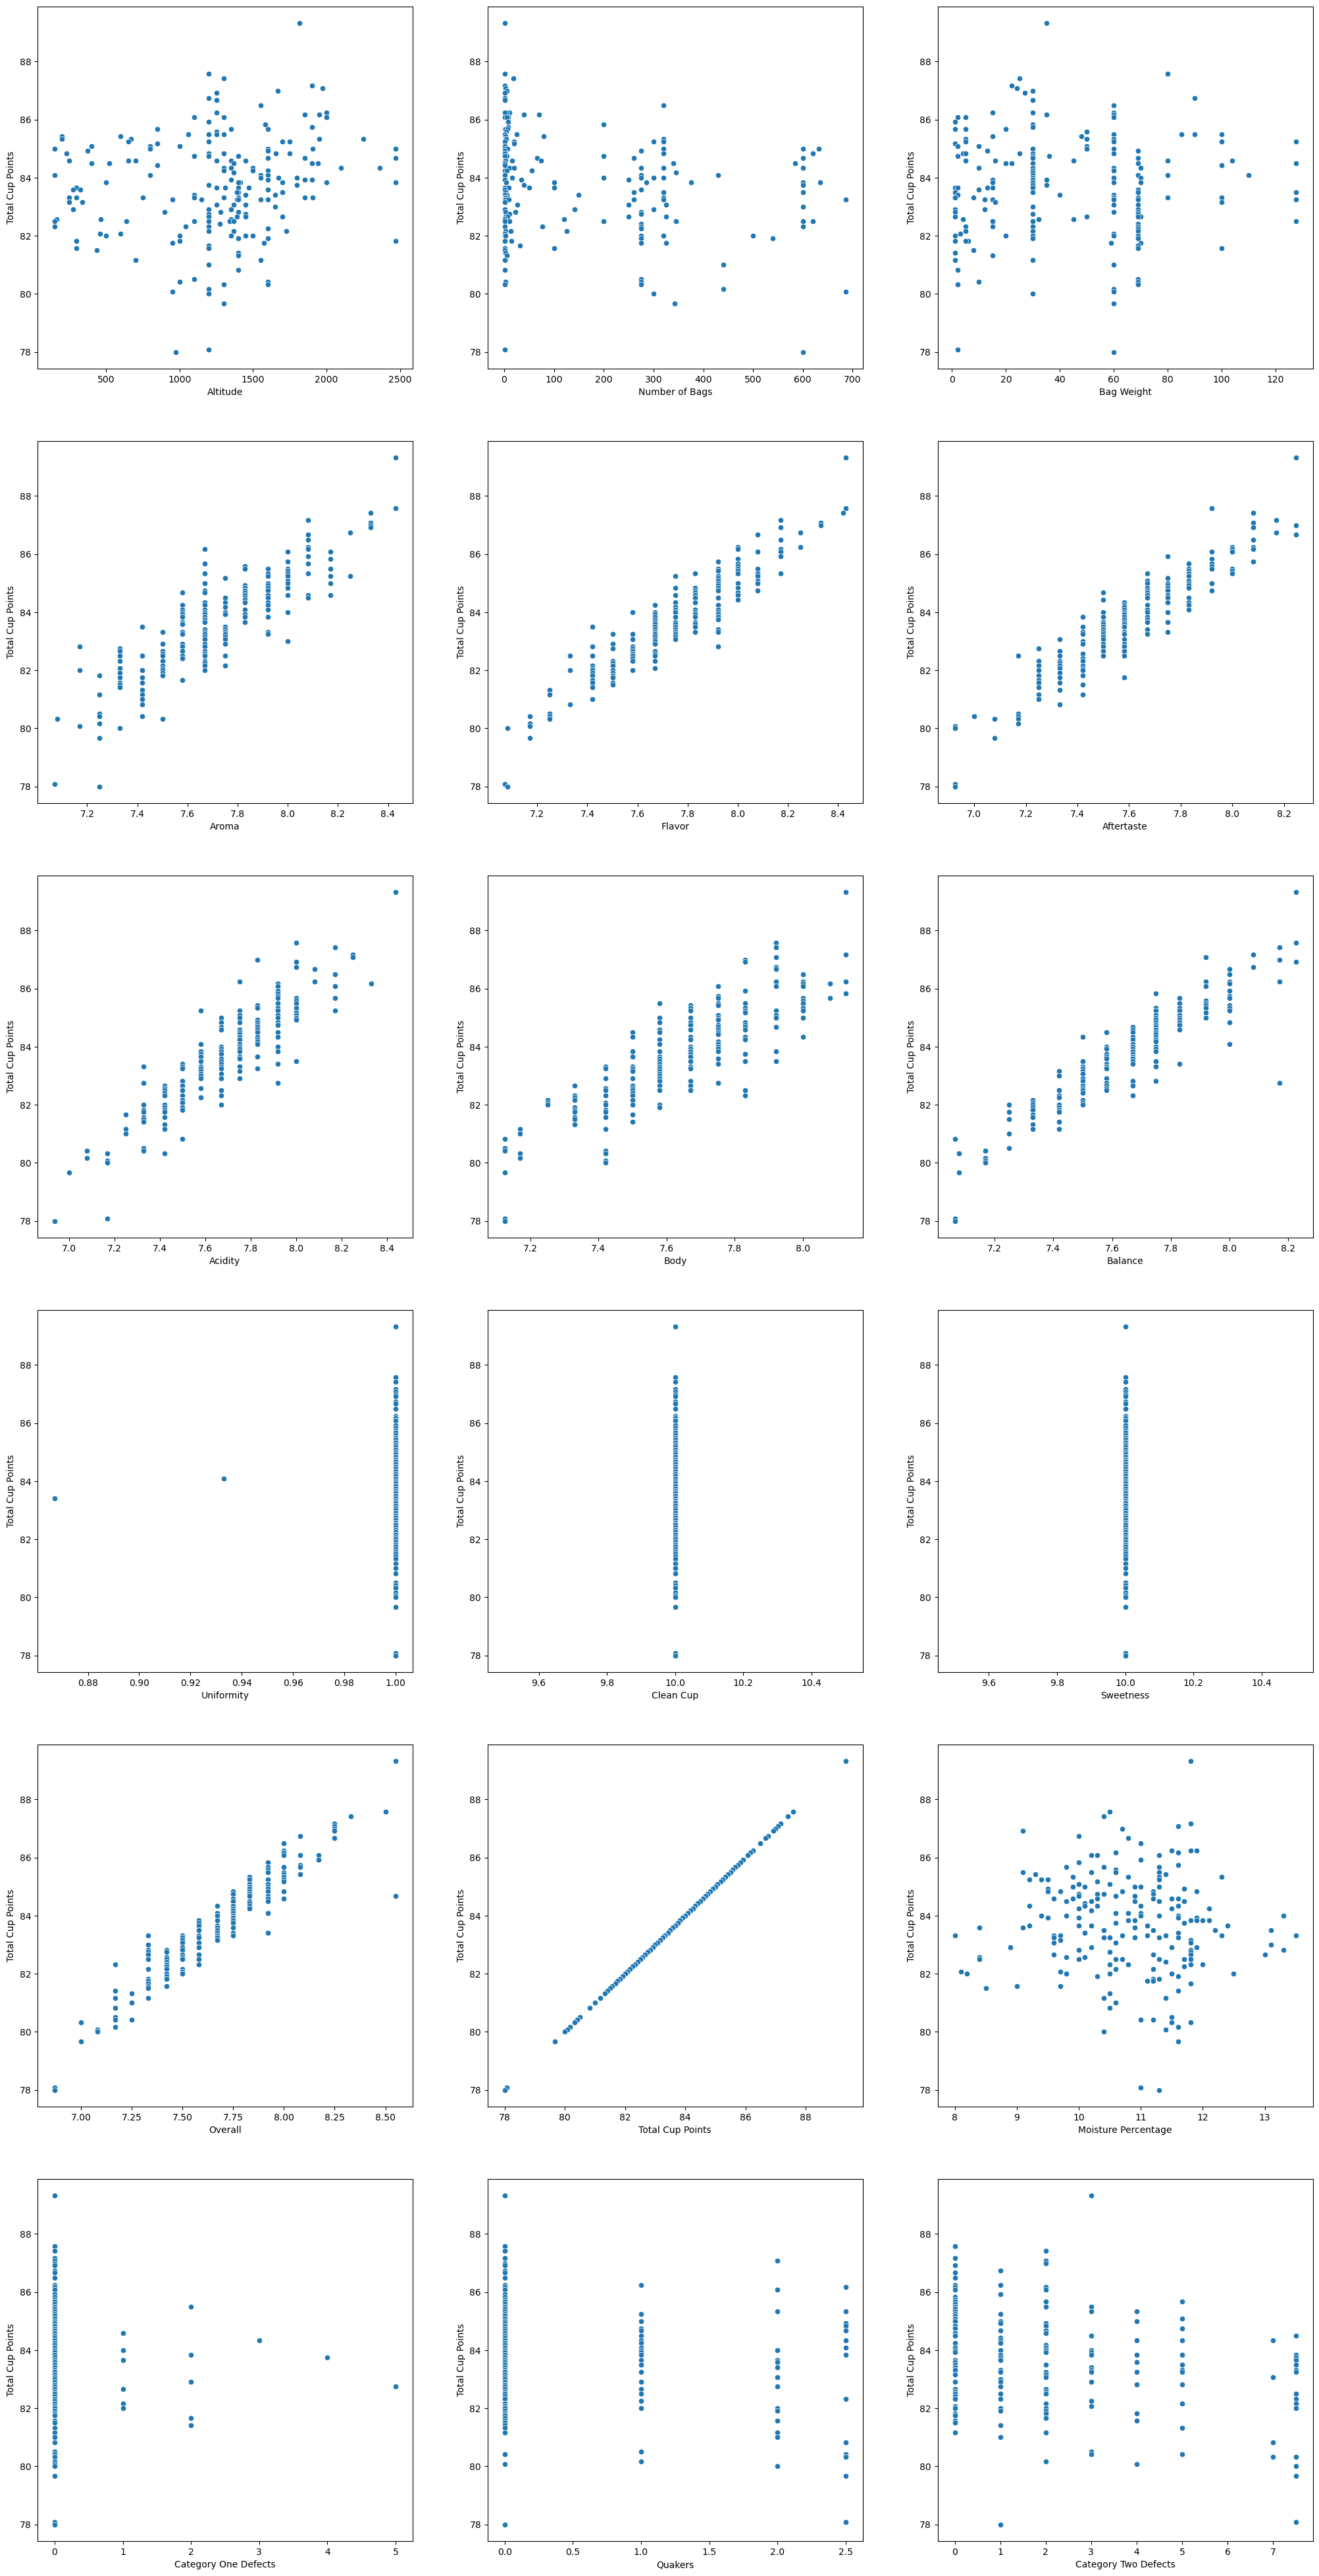

In [78]:
columns_list=list(df.columns)[0:18]
fig,ax =plt.subplots(ncols=3,nrows = 6,figsize=(25,50))
i=0
j=0
k=0
for col in columns_list:
    sns.scatterplot(data = df,x=col,y="Total Cup Points",ax = ax[i][j])
    j+=1
    if j==3:
        i+=1
        j=0

### As you can see from the graph, the Sweetness and Clean Cup columns have only one value, and they will be discarded because they are not useful for training the model.

In [79]:
df["Clean Cup"].value_counts()

10.0    207
Name: Clean Cup, dtype: int64

In [80]:
df["Sweetness"].value_counts()

10.0    207
Name: Sweetness, dtype: int64

In [81]:
df.drop(columns = ["Clean Cup","Sweetness"],axis=1,inplace = True)

### "Bag Weight","Uniformity","Moisture Percentage","Category One Defects" These columns will be discarded because they have too little correlation with the target column

In [82]:
df[["Bag Weight","Uniformity","Moisture Percentage","Category One Defects","Total Cup Points"]].corr()["Total Cup Points"]

Bag Weight              0.012297
Uniformity              0.003556
Moisture Percentage    -0.065405
Category One Defects   -0.058156
Total Cup Points        1.000000
Name: Total Cup Points, dtype: float64

In [83]:
df.drop(columns = ["Bag Weight","Uniformity","Moisture Percentage","Category One Defects"],axis=1,inplace = True)

## Building the model

In [85]:
def model(data):
    X=data.drop(columns="Total Cup Points",axis=1)
    y=data["Total Cup Points"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    lr = LinearRegression()
    model = lr.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    def score_test(y_ts,y_pr_ts,y_tr,y_pr_tr):
        print(f"R2 test : {r2_score(y_ts,y_pr_ts)}")
        print(f"MSE test: {mean_squared_error(y_ts,y_pr_ts)}")
        print(f"RMSE test : {mean_squared_error(y_ts,y_pr_ts,squared=True)}")
        print(f"MAE test : {mean_absolute_error(y_ts,y_pr_ts)}")
        print("\n")
        print(f"R2 train : {r2_score(y_tr,y_pr_tr)}")
        print(f"MSE train: {mean_squared_error(y_tr,y_pr_tr)}")
        print(f"RMSE train : {mean_squared_error(y_tr,y_pr_tr,squared=True)}")
        print(f"MAE train : {mean_absolute_error(y_tr,y_pr_tr)}")
    score_test(y_ts=y_test,y_pr_ts=y_pred_test,y_tr=y_train,y_pr_tr=y_pred_train)
    print("\n\n")
    data_pred = pd.DataFrame({"y_test" : y_test,"y_pred_test":y_pred_test})
    data_pred.reset_index(drop=True,inplace=True)
    print(data_pred.head())

In [86]:
model(df)

R2 test : 0.9872900928770537
MSE test: 0.03173289788600397
RMSE test : 0.03173289788600397
MAE test : 0.05264184522464143


R2 train : 0.9999538343988668
MSE train: 0.00014238878723904922
RMSE train : 0.00014238878723904922
MAE train : 0.007341929024423511



   y_test  y_pred_test
0   82.50    82.481820
1   86.08    86.091367
2   84.42    84.413727
3   83.92    83.888511
4   82.33    82.297235


## Model building with numerical data

In [93]:
data_numeric = df[list(df.columns)[:13]]
data_numeric.corr()[["Total Cup Points"]]

,Total Cup Points
Altitude,0.168230
Number of Bags,-0.222249
Aroma,0.863167
Flavor,0.936029
Aftertaste,0.929796
Acidity,0.894978
Body,0.840253
Balance,0.923055
Overall,0.946092
Total Cup Points,1.000000


<Axes: >

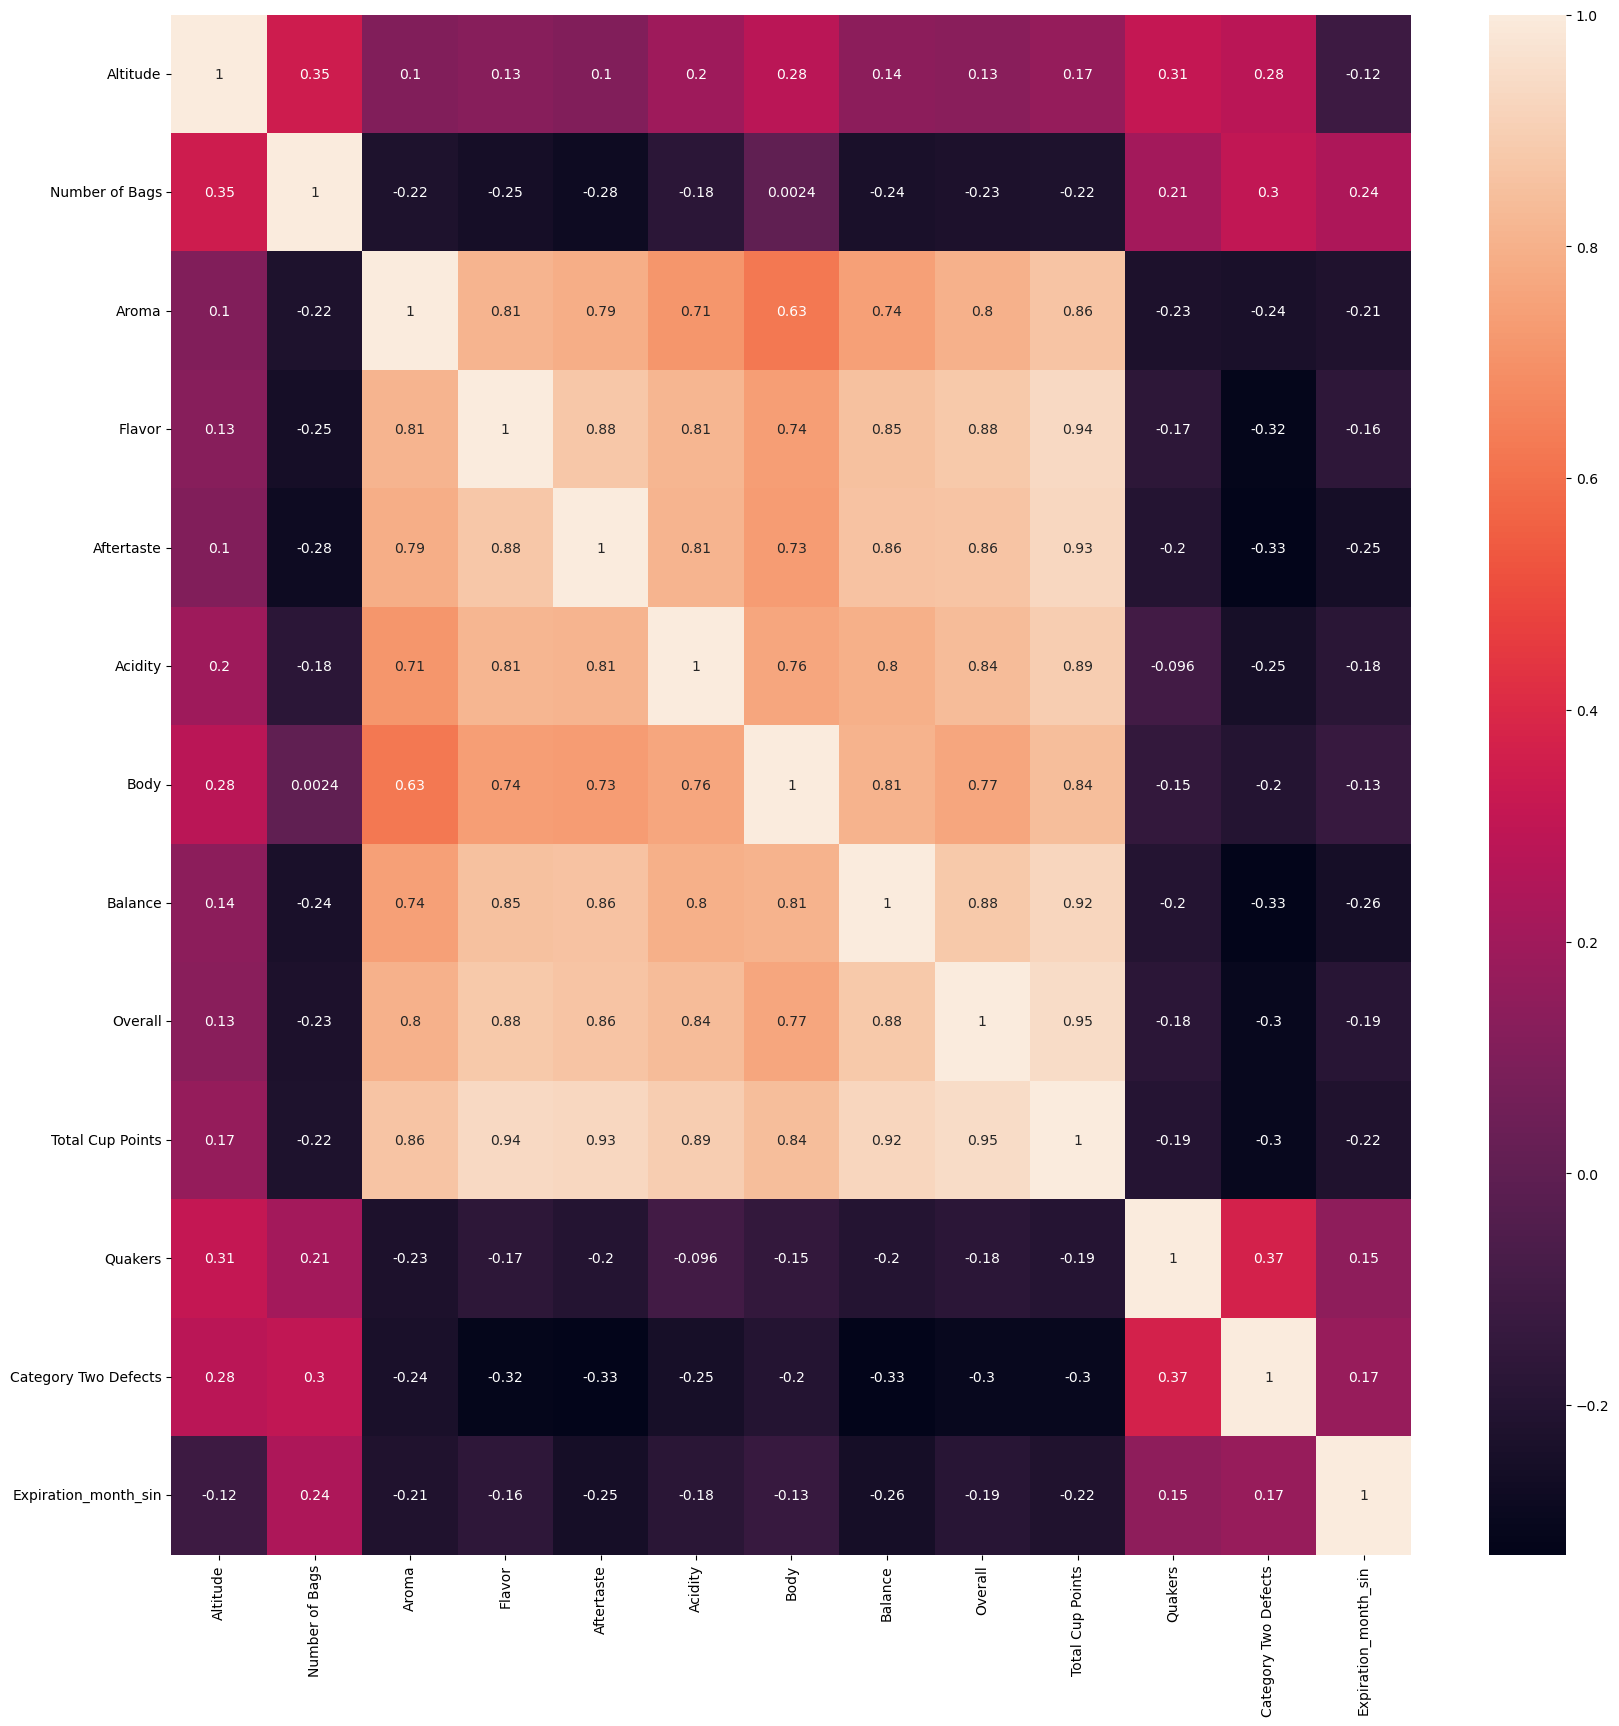

In [88]:
plt.figure(figsize = (20,20))
sns.heatmap(data_numeric.corr(),annot=True)

In [89]:
model(data_numeric)

R2 test : 0.98569265676975
MSE test: 0.03572122576142698
RMSE test : 0.03572122576142698
MAE test : 0.07303816804098502


R2 train : 0.9917243594900547
MSE train: 0.025524598118744954
RMSE train : 0.025524598118744954
MAE train : 0.06469648802646673



   y_test  y_pred_test
0   82.50    82.502984
1   86.08    86.125940
2   84.42    84.360295
3   83.92    83.916314
4   82.33    82.229375


In [90]:
model(df)

R2 test : 0.9872900928770537
MSE test: 0.03173289788600397
RMSE test : 0.03173289788600397
MAE test : 0.05264184522464143


R2 train : 0.9999538343988668
MSE train: 0.00014238878723904922
RMSE train : 0.00014238878723904922
MAE train : 0.007341929024423511



   y_test  y_pred_test
0   82.50    82.481820
1   86.08    86.091367
2   84.42    84.413727
3   83.92    83.888511
4   82.33    82.297235
